In [5]:
import pandas as pd
data_set=pd.read_csv("./train.csv",index_col='ID')

In [6]:
import datetime as datetime
data_set['Datetime']=pd.to_datetime(data_set['Datetime'],format='%d-%m-%Y %H:%M')
data_set.index=data_set['Datetime']
data_set=data_set.drop('Datetime',axis=1)
daily_train=data_set.resample('D').sum()
#保留字处理
daily_train['ds']=daily_train.index
daily_train['y']=daily_train.Count
daily_train.drop(['Count'],axis=1,inplace=True)

In [7]:
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [9]:
from fbprophet import Prophet

In [10]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniforml

In [12]:
m=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(daily_train)
future=m.make_future_dataframe(periods=213)
forecast=m.predict(future)

INFO:numexpr.utils:Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-687.216303,-2276.678385,62.632796,-687.216303,-687.216303,-423.576256,-423.576256,-423.576256,-994.383343,-994.383343,-994.383343,570.807087,570.807087,570.807087,0.0,0.0,0.0,-1110.792559
1,2012-08-26,-679.114521,-2499.817910,40.573562,-679.114521,-679.114521,-581.486251,-581.486251,-581.486251,-1143.350685,-1143.350685,-1143.350685,561.864434,561.864434,561.864434,0.0,0.0,0.0,-1260.600772
2,2012-08-27,-671.012739,-850.295805,1582.542999,-671.012739,-671.012739,1007.308260,1007.308260,1007.308260,457.250478,457.250478,457.250478,550.057783,550.057783,550.057783,0.0,0.0,0.0,336.295522
3,2012-08-28,-662.910957,-624.656376,1738.292516,-662.910957,-662.910957,1144.106545,1144.106545,1144.106545,607.909678,607.909678,607.909678,536.196867,536.196867,536.196867,0.0,0.0,0.0,481.195589
4,2012-08-29,-654.809174,-684.779535,1595.950052,-654.809174,-654.809174,1077.587083,1077.587083,1077.587083,556.476625,556.476625,556.476625,521.110459,521.110459,521.110459,0.0,0.0,0.0,422.777909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16251.283611,15330.077970,17799.223063,15825.130334,16673.024448,297.105356,297.105356,297.105356,556.476625,556.476625,556.476625,-259.371269,-259.371269,-259.371269,0.0,0.0,0.0,16548.388967
971,2015-04-23,16278.812096,15102.984189,17547.655477,15848.814718,16703.631102,64.225516,64.225516,64.225516,360.102667,360.102667,360.102667,-295.877151,-295.877151,-295.877151,0.0,0.0,0.0,16343.037613
972,2015-04-24,16306.340581,14862.968817,17367.742909,15874.452402,16734.237756,-181.012341,-181.012341,-181.012341,155.994580,155.994580,155.994580,-337.006921,-337.006921,-337.006921,0.0,0.0,0.0,16125.328240
973,2015-04-25,16333.869066,13804.511326,16327.521821,15899.857395,16764.755483,-1376.368599,-1376.368599,-1376.368599,-994.383343,-994.383343,-994.383343,-381.985256,-381.985256,-381.985256,0.0,0.0,0.0,14957.500467


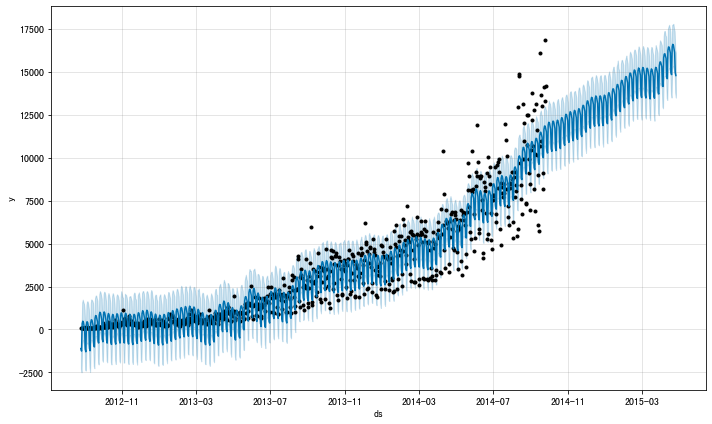

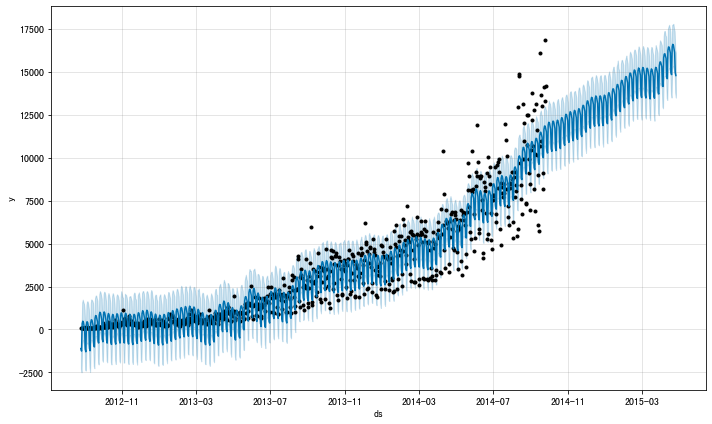

In [14]:
m.plot(forecast)